# Market Basket Analysis in Python using Apriori Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
data = pd.read_csv('Grocery_data.csv', header = None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


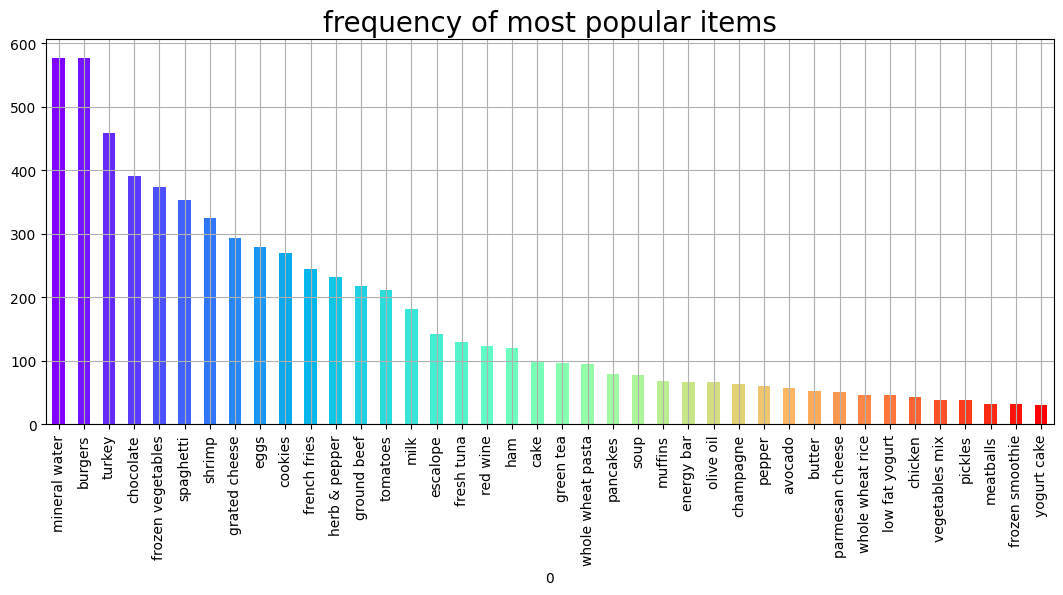

In [5]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [6]:
# Getting the list of transactions from the dataset
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

In [7]:
transactions[:1]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil']]

In [8]:
from itertools import permutations

# Extract unique items.
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

In [9]:
print('# of items:',len(items))
print(list(items))

# of items: 121
['gluten free bar', 'chocolate bread', 'nan', 'yams', 'muffins', 'eggs', 'cake', 'magazines', 'shrimp', 'mint', 'cider', 'chicken', 'sparkling water', 'honey', 'spaghetti', 'clothes accessories', 'mashed potato', 'babies food', 'frozen smoothie', 'fromage blanc', 'flax seed', 'shampoo', 'pasta', 'ham', 'whole wheat rice', 'pet food', 'water spray', 'black tea', 'low fat yogurt', 'sandwich', 'hand protein bar', 'cooking oil', 'hot dogs', 'almonds', 'salt', 'burger sauce', 'champagne', 'salmon', 'strong cheese', 'strawberries', 'fresh bread', 'rice', 'bacon', 'gums', 'carrots', 'bramble', 'extra dark chocolate', 'zucchini', 'frozen vegetables', 'tomatoes', 'fresh tuna', 'meatballs', 'whole wheat pasta', 'white wine', 'cereals', 'oatmeal', 'cream', 'spinach', 'ground beef', 'green grapes', 'pancakes', 'toothpaste', ' asparagus', 'milk', 'tea', 'mint green tea', 'olive oil', 'french wine', 'ketchup', 'cottage cheese', 'shallot', 'burgers', 'antioxydant juice', 'brownies', '

In [10]:
if 'nan' in items: items.remove('nan')
print(list(items))

['gluten free bar', 'chocolate bread', 'yams', 'muffins', 'eggs', 'cake', 'magazines', 'shrimp', 'mint', 'cider', 'chicken', 'sparkling water', 'honey', 'spaghetti', 'clothes accessories', 'mashed potato', 'babies food', 'frozen smoothie', 'fromage blanc', 'flax seed', 'shampoo', 'pasta', 'ham', 'whole wheat rice', 'pet food', 'water spray', 'black tea', 'low fat yogurt', 'sandwich', 'hand protein bar', 'cooking oil', 'hot dogs', 'almonds', 'salt', 'burger sauce', 'champagne', 'salmon', 'strong cheese', 'strawberries', 'fresh bread', 'rice', 'bacon', 'gums', 'carrots', 'bramble', 'extra dark chocolate', 'zucchini', 'frozen vegetables', 'tomatoes', 'fresh tuna', 'meatballs', 'whole wheat pasta', 'white wine', 'cereals', 'oatmeal', 'cream', 'spinach', 'ground beef', 'green grapes', 'pancakes', 'toothpaste', ' asparagus', 'milk', 'tea', 'mint green tea', 'olive oil', 'french wine', 'ketchup', 'cottage cheese', 'shallot', 'burgers', 'antioxydant juice', 'brownies', 'light mayo', 'whole wea

In [11]:
# Compute and print rules.
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

# of rules: 14280
[('gluten free bar', 'chocolate bread'), ('gluten free bar', 'yams'), ('gluten free bar', 'muffins'), ('gluten free bar', 'eggs'), ('gluten free bar', 'cake')]


In [12]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
onehot.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [13]:
# Compute the support
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()

,support
mineral water,0.238368
eggs,0.179709
spaghetti,0.174110
french fries,0.170911
chocolate,0.163845


In [14]:
support.describe()

,support
count,120.000000
mean,0.032616
std,0.042370
min,0.000133
25%,0.007566
50%,0.015665
75%,0.035929
max,0.238368


In [15]:
# Compute support for burgers and french fries
supportBF = np.logical_and(onehot['burgers'], onehot['french fries']).mean()

# Compute support for burgers and mineral water
supportBM = np.logical_and(onehot['burgers'], onehot['mineral water']).mean()

# Compute support for french fries and mineral water
supportFM = np.logical_and(onehot['french fries'], onehot['mineral water']).mean()

# Print support values
print("burgers and french fries: %.2f" % supportBF)
print("burgers and mineral water: %.2f" % supportBM)
print("french fries and mineral water: %.2f" % supportFM)

burgers and french fries: 0.02
burgers and mineral water: 0.02
french fries and mineral water: 0.03


In [16]:
# Add a mineral water+french fries column to the DataFrame onehot
onehot['mineral water+french fries'] = np.logical_and(onehot['mineral water'], onehot['french fries'])

# Compute the support
support = onehot.mean()
val = support.loc['mineral water+french fries']

# Print the support values
print(f'mineral water+french fries support = {val}')

mineral water+french fries support = 0.03372883615517931


In [17]:
# Compute support for mineral water and french fries
supportMF = np.logical_and(onehot['mineral water'], onehot['french fries']).mean()

# Compute support for mineral water
supportM = onehot['mineral water'].mean()

# Compute support for french fries
supportF = onehot['french fries'].mean()

# Compute confidence for both rules
confidenceMM = supportMF / supportM
confidenceMF = supportMF / supportF

# Print results
print('mineral water = {0:.2f}, french fries = {1:.2f}'.format(confidenceMM, confidenceMF))

mineral water = 0.14, french fries = 0.20


In [18]:
# Compute lift
lift = supportMF / (supportM * supportF)

# Print lift
print("Lift: %.2f" % lift)

Lift: 0.83


In [19]:
# Compute support for burgers AND french fries
supportBF = np.logical_and(onehot['burgers'], onehot['french fries']).mean()

# Compute support for burgers
supportB = onehot['burgers'].mean()

# Compute support for NOT french fries
supportnF = 1.0 - onehot['french fries'].mean()

# Compute support for burgers and NOT french fries
supportBnF = supportB - supportBF

# Compute and print conviction for burgers -> french fries
conviction = supportB * supportnF / supportBnF
print("Conviction: %.2f" % conviction)

Conviction: 1.11


In [20]:
def conviction(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for NOT consequent
    supportnC = 1.0 - consequent.mean()

    # Compute support for antecedent and NOT consequent
    supportAnC = supportA - supportAC

    # Return conviction
    return (supportA * supportnC )/ supportAnC

In [21]:
def leverage(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAB = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for consequent
    supportB = consequent.mean()

    # Return leverage
    return supportAB - supportB * supportA

In [22]:
# Compute conviction for burgers -> french fries and french fries -> burgers
convictionBF = conviction(onehot['burgers'], onehot['french fries'])
convictionFB = conviction(onehot['french fries'], onehot['burgers'])

# Compute conviction for burgers -> mineral water and mineral water -> burgers
convictionBM = conviction(onehot['burgers'], onehot['mineral water'])
convictionMB = conviction(onehot['mineral water'], onehot['burgers'])

# Compute conviction for french fries -> mineral water and mineral water -> french fries
convictionFM = conviction(onehot['french fries'], onehot['mineral water'])
convictionMF = conviction(onehot['mineral water'], onehot['french fries'])

# Print results
print('french fries -> burgers: ', convictionFB)
print('burgers -> french fries: ', convictionBF)

french fries -> burgers:  1.0476495106531305
burgers -> french fries:  1.1088435652342468


In [23]:
# Compute the support of burgers and french fries
supportT = onehot['burgers'].mean()
supportP = onehot['french fries'].mean()

# Compute the support of both food items
supportTP = np.logical_and(onehot['burgers'], onehot['french fries']).mean()

# Complete the expressions for the numerator and denominator
numerator = supportTP - supportT*supportP
denominator = max(supportTP*(1-supportT), supportT*(supportP-supportTP))

# Compute and print Zhang's metric
zhang = numerator / denominator
print(zhang)

0.3533836982354581


In [24]:
# Define a function to compute Zhang's metric
def zhang(antecedent, consequent):
    # Compute the support of each book
    supportA = antecedent.mean()
    supportC = consequent.mean()

    # Compute the support of both books
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Complete the expressions for the numerator and denominator
    numerator = supportAC - supportA*supportC
    denominator = max(supportAC*(1-supportA), supportA*(supportC-supportAC))

    # Return Zhang's metric
    return numerator / denominator

In [25]:
# Create rules DataFrame
rules_ = pd.DataFrame(rules, columns=['antecedents','consequents'])

# Define an empty list for metrics
zhangs, conv, lev, antec_supp, cons_supp, suppt, conf, lft = [], [], [], [], [], [], [], []

# Loop over lists in itemsets
for itemset in rules:
    # Extract the antecedent and consequent columns
    antecedent = onehot[itemset[0]]
    consequent = onehot[itemset[1]]
    
    antecedent_support = onehot[itemset[0]].mean()
    consequent_support = onehot[itemset[1]].mean()
    support = np.logical_and(onehot[itemset[0]], onehot[itemset[1]]).mean()
    confidence = support / antecedent_support
    lift = support / (antecedent_support * consequent_support)
    
    # Complete metrics and append it to the list
    antec_supp.append(antecedent_support)
    cons_supp.append(consequent_support)
    suppt.append(support)
    conf.append(confidence)
    lft.append(lift)
    lev.append(leverage(antecedent, consequent))
    conv.append(conviction(antecedent, consequent))
    zhangs.append(zhang(antecedent, consequent))
    
# Store results
rules_['antecedent support'] = antec_supp
rules_['consequent support'] = cons_supp
rules_['support'] = suppt
rules_['confidence'] = conf
rules_['lift'] = lft
rules_['leverage'] = lev
rules_['conviction'] = conv
rules_['zhang'] = zhangs

# Print results
rules_.sort_values('zhang',ascending=False).head()

C:\Users\amazi\AppData\Local\Temp\ipykernel_9372\2989351628.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  return (supportA * supportnC )/ supportAnC


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
8391,burgers,asparagus,0.087188,0.000133,0.000133,0.001529,11.469419,0.000122,1.001398,1.0
13627,energy bar,asparagus,0.027063,0.000133,0.000133,0.004926,36.950739,0.000130,1.004817,1.0
10414,soup,asparagus,0.050527,0.000133,0.000133,0.002639,19.791557,0.000127,1.002512,1.0
893,shrimp,asparagus,0.071457,0.000133,0.000133,0.001866,13.994403,0.000124,1.001736,1.0
6843,ground beef,asparagus,0.098254,0.000133,0.000133,0.001357,10.177748,0.000120,1.001225,1.0


In [26]:
rules_.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
count,14280.000000,14280.000000,14280.000000,14280.000000,14280.000000,14280.000000,1.428000e+04,14280.000000
mean,0.032616,0.032616,0.001389,0.044870,1.475580,0.000341,inf,-0.011826
std,0.042195,0.042195,0.003351,0.066355,1.879564,0.001157,NaN,0.623612
min,0.000133,0.000133,0.000000,0.000000,0.000000,-0.011697,7.616318e-01,-1.000000
25%,0.007566,0.007566,0.000133,0.004902,0.475787,-0.000048,9.953340e-01,-0.534745
50%,0.015665,0.015665,0.000400,0.021739,1.236564,0.000085,1.004127e+00,0.199959
75%,0.035929,0.035929,0.001200,0.056872,1.874834,0.000370,1.021102e+00,0.485044
max,0.238368,0.238368,0.059725,1.000000,45.460606,0.022088,inf,1.000000


In [27]:
rules_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14280 entries, 0 to 14279
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         14280 non-null  object 
 1   consequents         14280 non-null  object 
 2   antecedent support  14280 non-null  float64
 3   consequent support  14280 non-null  float64
 4   support             14280 non-null  float64
 5   confidence          14280 non-null  float64
 6   lift                14280 non-null  float64
 7   leverage            14280 non-null  float64
 8   conviction          14280 non-null  float64
 9   zhang               14280 non-null  float64
dtypes: float64(8), object(2)
memory usage: 1.1+ MB


In [28]:
# Select the subset of rules with antecedent support greater than 0.05
rules_filtered = rules_[rules_['antecedent support'] > 0.05]

# Select the subset of rules with a consequent support greater than 0.01
rules_filtered = rules_[rules_['consequent support'] > 0.01]

# Select the subset of rules with a conviction greater than 1.01
rules_filtered = rules_[rules_['conviction'] > 1.01]

# Select the subset of rules with a lift greater than 1.0
rules_filtered = rules_[rules_['lift'] > 1.0]

# Print remaining rules
print(f'# of rules = {len(rules_)}')
print(f'# of rules after filtering = {len(rules_filtered)}')
print(rules_filtered.head())

# of rules = 14280
# of rules after filtering = 8598
       antecedents      consequents  antecedent support  consequent support   
0  gluten free bar  chocolate bread            0.006932            0.004266  \
1  gluten free bar             yams            0.006932            0.011465   
2  gluten free bar          muffins            0.006932            0.024130   
3  gluten free bar             eggs            0.006932            0.179709   
5  gluten free bar        magazines            0.006932            0.010932   

    support  confidence      lift  leverage  conviction     zhang  
0  0.000133    0.019231  4.507812  0.000104    1.015258  0.783595  
1  0.000267    0.038462  3.354651  0.000187    1.028076  0.706806  
2  0.000667    0.096154  3.984807  0.000499    1.079686  0.754276  
3  0.001600    0.230769  1.284125  0.000354    1.066378  0.222804  
5  0.000133    0.019231  1.759146  0.000058    1.008462  0.434555  


In [29]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, 
                            min_support = 0.05, 
                            max_len = 3, 
                            use_colnames = True)

# Print a preview of the frequent itemsets
frequent_itemsets.head()

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)


In [30]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using a support of 0.04 and length of 3
frequent_itemsets_1 = apriori(onehot, min_support = 0.04, 
                            max_len = 3, use_colnames = True)

# Compute frequent itemsets using a support of 0.05 and length of 3
frequent_itemsets_2 = apriori(onehot, min_support = 0.05, 
                            max_len = 3, use_colnames = True)

# Print the number of freqeuent itemsets
print(len(frequent_itemsets_1), len(frequent_itemsets_2))

35 28


In [31]:
# Import the association rule function from mlxtend
from mlxtend.frequent_patterns import association_rules

# Compute all association rules for frequent_itemsets_1
rules_1 = association_rules(frequent_itemsets_1, 
                            metric = "support", 
                            min_threshold = 0.001)

# Compute all association rules for frequent_itemsets_2
rules_2 = association_rules(frequent_itemsets_2, 
                            metric = "support", 
                            min_threshold = 0.002)

# Print the number of association rules generated
print(len(rules_1), len(rules_2))

10 6


In [32]:
# Apply the Apriori algorithm with a minimum support threshold of 0.04
frequent_itemsets = apriori(onehot, min_support = 0.04, use_colnames = True)

# Recover association rules using a minium support threshold of 0.01
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.01)

# Apply a 0.002 antecedent support threshold, 0.01 confidence threshold, and 2.50 lift threshold
filtered_rules = rules[(rules['antecedent support'] > 0.002) &
                       (rules['consequent support'] > 0.01) &
                       (rules['confidence'] > 0.20) &
                       (rules['lift'] > 1.50)]

# Print remaining rule
filtered_rules[['antecedents','consequents']]

,antecedents,consequents
4,(ground beef),(mineral water)
6,(milk),(mineral water)
7,(mineral water),(milk)
